In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import colormaps as cm

In [2]:
def get_distances(points, norm=np.linalg.norm):
    # 
    mat = np.concatenate([[points] for i in points])
    dis = mat - mat.transpose((1, 0, 2))
    dis = norm(dis, axis=2)
    return dis

# Cech and Rips complexes

In [3]:
points = np.array([[ 0.0,  0.0], 
                   [ 0.8,  0.0], 
                   [ 0.4,  0.6],
                   [-0.1, -1.5], 
                   [ 0.8, -1.5], 
                   [ 0.4, -2.1], 
                   [ 2.6,  0.1], 
                   [ 2.5, -1.7]])
r = 1.0

In [4]:
xmin = points[:, 0].min() - r
xmax = points[:, 0].max() + r
ymin = points[:, 1].min() - r
ymax = points[:, 1].max() + r

if True: # make square
    xwidth = xmax - xmin
    ywidth = ymax - ymin
    if xwidth > ywidth:
        add = 0.5*(xwidth - ywidth)
        ymax += add
        ymin -= add
    elif ywidth > xwidth:
        add = 0.5*(ywidth - xwidth)
        xmax += add
        xmin -= add


frame = np.array([[xmin, xmin, xmax, xmax, xmin], 
                  [ymin, ymax, ymax, ymin, ymin]])
frame_alpha = 0.0

In [5]:
figsize = (10, 10)

In [6]:
dists = get_distances(points)

In [7]:
edges = np.unique(np.sort(np.array(np.where(dists < 2*r)).transpose(), axis=1), axis=0)
edges = edges[edges[:, 0] != edges[:, 1]]

In [8]:
simplices_c = []

n = len(points)
for i in range(n):
    for j in range(i+1, n):
        for k in range(j+1, n):
            if (dists[[i, i, j], [j, k, k]] < 2*r).all():
                simplices_c.append([i, j, k])
simplices_c

[[0, 1, 2], [0, 1, 3], [0, 1, 4], [0, 3, 4], [1, 3, 4], [3, 4, 5]]

In [9]:
simplices_r = []

n = len(points)
for i in range(n):
    for j in range(i+1, n):
        for k in range(j+1, n):
            if (dists[[i, i, j], [j, k, k]] < r).all():
                simplices_r.append([i, j, k])
simplices_r

[[0, 1, 2], [3, 4, 5]]

In [10]:
simplices = []
n = len(points)
for i in range(n):
    for j in range(i+1, n):
        for k in range(j+1, n):
            simplices.append((i, j, k))
colors = {tuple(simplices[i]) : cm['jet'](i/(len(simplices)-1)) for i in range(len(simplices))}

In [11]:
filename = 'LaTeX/pics/complex{0}.png'

## P

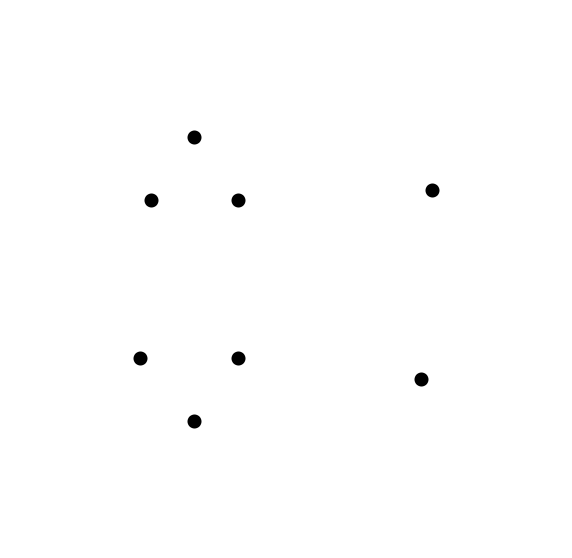

In [12]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.scatter(points[:,0], points[:,1], color='black', linewidth=8)
    
plt.plot(frame[0], frame[1], color='black', linewidth=1, linestyle=':', alpha=frame_alpha)
fig.savefig(filename.format('P'))

## U

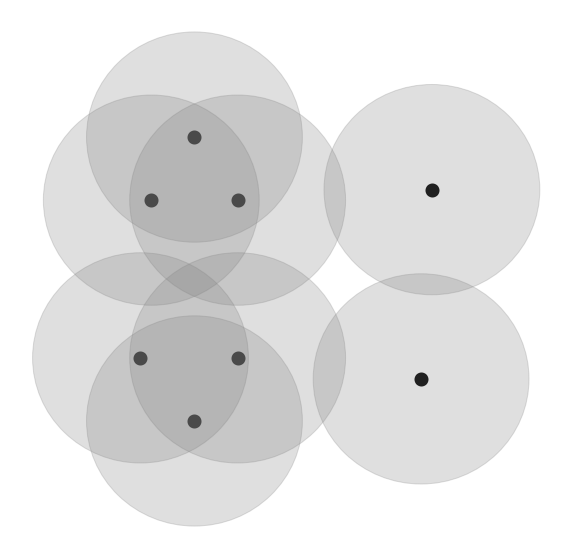

In [13]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.scatter(points[:,0], points[:,1], color='black', linewidth=8)
for point in points:
    circle = patches.Circle(point, radius=r, color='grey', alpha=0.25)
    ax.add_patch(circle)
    
plt.plot(frame[0], frame[1], color='black', linewidth=1, linestyle=':', alpha=frame_alpha)
fig.savefig(filename.format('U'))

## C

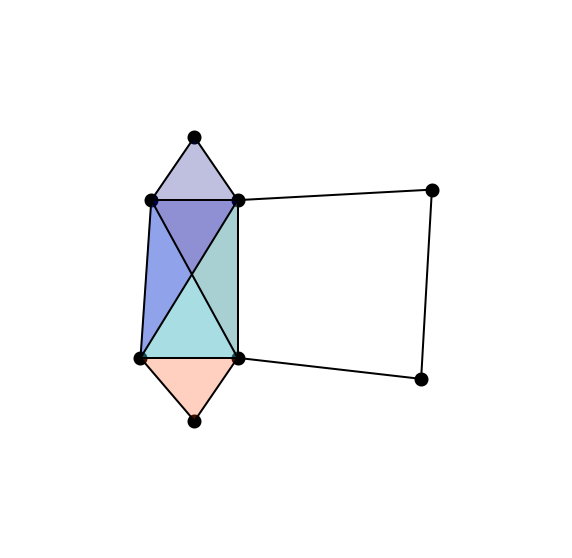

In [14]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

x, y = points.transpose()
plt.scatter(x, y, color='black', linewidth=8)
for edge in edges:
    plt.plot(x[edge], y[edge], color='black', linewidth=2)
for simplex in simplices_c:
    plt.fill(x[simplex], y[simplex], color=colors[tuple(simplex)], alpha=0.25)
    
plt.plot(frame[0], frame[1], color='black', linewidth=1, linestyle=':', alpha=frame_alpha)
fig.savefig(filename.format('C'))

## R

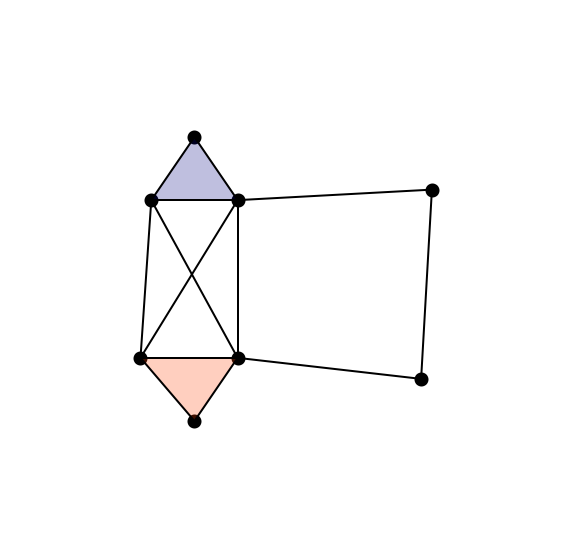

In [15]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

x, y = points.transpose()
plt.scatter(x, y, color='black', linewidth=8)
for edge in edges:
    plt.plot(x[edge], y[edge], color='black', linewidth=2)
for simplex in simplices_r:
    plt.fill(x[simplex], y[simplex], color=colors[tuple(simplex)], alpha=0.25)
    
plt.plot(frame[0], frame[1], color='black', linewidth=1, linestyle=':', alpha=frame_alpha)
fig.savefig(filename.format('R'))

# Persistent

In [16]:
points = np.array([[-3.0, 0.0], 
                   [ 3.0, 0.0], 
                   [ 0.0, 4.0]], dtype=int)
x, y = points.transpose()

In [17]:
filename = 'LaTeX/pics/persistent{0}.png'

# U

In [18]:
radiuses = [1, 2.5, 3, 3.125]

comments = np.array([['$X_a = B_{b}(P)$'.replace('a', str(i)).replace('b', str(radiuses[i])) for i in range(len(radiuses))], 
                     ['\n' for r in radiuses], 
                     ['$H_0 = \mathbb{Z}^3$', '$H_0 = \mathbb{Z}^1$', '$H_0 = \mathbb{Z}^1$', '$H_0 = \mathbb{Z}^1$'],
                     [';  ' for r in radiuses],
                     ['$H_1 = 0$', '$H_1 = 0$', '$H_1 = \mathbb{Z}^1$', '$H_1 = 0$']
                    ])

comments = [''.join(comments[:, i]) for i in range(len(radiuses))]
comments = [i.replace('B', 'U') for i in comments]
comments = np.array([i.split('\n') for i in comments])
comments

array([['$X_0 = U_{1}(P)$', '$H_0 = \\mathbb{Z}^3$;  $H_1 = 0$'],
       ['$X_1 = U_{2.5}(P)$', '$H_0 = \\mathbb{Z}^1$;  $H_1 = 0$'],
       ['$X_2 = U_{3}(P)$',
        '$H_0 = \\mathbb{Z}^1$;  $H_1 = \\mathbb{Z}^1$'],
       ['$X_3 = U_{3.125}(P)$', '$H_0 = \\mathbb{Z}^1$;  $H_1 = 0$']],
      dtype='<U43')

In [19]:
xticks = [-6, -3, 0, 3, 6]
yticks = [-2, 0, 2, 4, 6]

r = max(radiuses)
xmin = points[:, 0].min() - r
xmax = points[:, 0].max() + r
ymin = points[:, 1].min() - r
ymax = points[:, 1].max() + r

frame = np.array([[xmin, xmin, xmax, xmax, xmin], 
                  [ymin, ymax, ymax, ymin, ymin]])
frame_alpha = 0.0

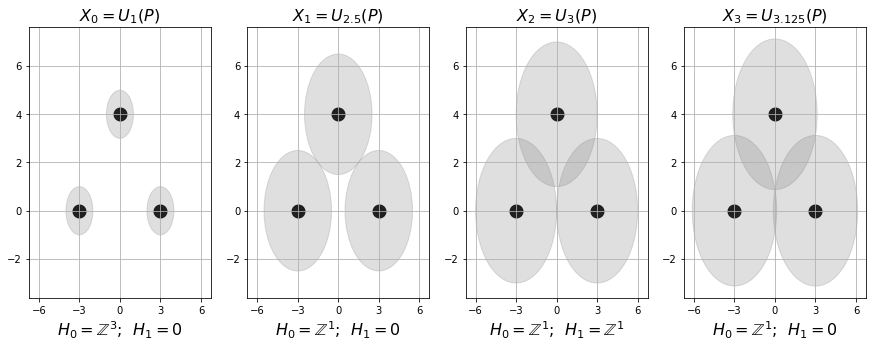

In [20]:
fig, axs = plt.subplots(1, len(radiuses), figsize=(15, 5))
for i in range(len(radiuses)):
    ax = axs[i]
    ax.set_title(comments[i, 0], fontdict={'fontsize': 16})
    ax.set_xlabel(comments[i, 1], fontdict={'fontsize': 16})
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    
    ax.scatter(x, y, color='black', linewidth=8)
    ax.plot(frame[0], frame[1], color='black', linewidth=1, linestyle=':', alpha=frame_alpha)
    for point in points:
        circle = patches.Circle(point, radius=radiuses[i], color='grey', alpha=0.25)
        ax.add_patch(circle)
    ax.grid(True)
    
fig.savefig(filename.format('U'))

## C

In [21]:
edges = [[], 
         [[0, 2], [1, 2]], 
         [[0, 1], [0, 2], [1, 2]], 
         [[0, 1], [0, 2], [1, 2]]]
simplices = [[], [], [], 
             [[0, 1, 2]]]

In [22]:
comments = np.array([['$X_a = B_{b}(P)$'.replace('a', str(i)).replace('b', str(radiuses[i])) for i in range(len(radiuses))], 
                     ['\n' for r in radiuses], 
                     ['$H_0 = \mathbb{Z}^3$', '$H_0 = \mathbb{Z}^1$', '$H_0 = \mathbb{Z}^1$', '$H_0 = \mathbb{Z}^1$'],
                     [';  ' for r in radiuses],
                     ['$H_1 = 0$', '$H_1 = 0$', '$H_1 = \mathbb{Z}^1$', '$H_1 = 0$']
                    ])
comments = [''.join(comments[:, i]) for i in range(len(radiuses))]
comments = [i.replace('B', 'C') for i in comments]
comments = np.array([i.split('\n') for i in comments])
comments

array([['$X_0 = C_{1}(P)$', '$H_0 = \\mathbb{Z}^3$;  $H_1 = 0$'],
       ['$X_1 = C_{2.5}(P)$', '$H_0 = \\mathbb{Z}^1$;  $H_1 = 0$'],
       ['$X_2 = C_{3}(P)$',
        '$H_0 = \\mathbb{Z}^1$;  $H_1 = \\mathbb{Z}^1$'],
       ['$X_3 = C_{3.125}(P)$', '$H_0 = \\mathbb{Z}^1$;  $H_1 = 0$']],
      dtype='<U43')

In [23]:
xmin, xmax = -4, 4
ymin, ymax = -1, 5
frame = np.array([[xmin, xmin, xmax, xmax, xmin], 
                  [ymin, ymax, ymax, ymin, ymin]])
frame_alpha = 0.0

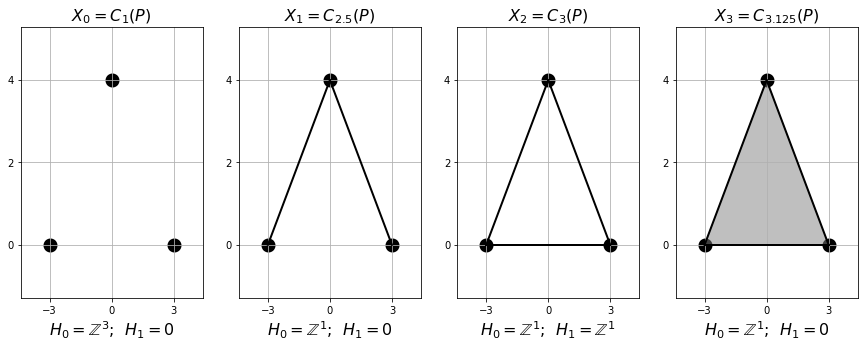

In [24]:
fig, axs = plt.subplots(1, len(radiuses), figsize=(15, 5))
for i in range(len(radiuses)):
    ax = axs[i]
    ax.set_title(comments[i, 0], fontdict={'fontsize': 16})
    ax.set_xlabel(comments[i, 1], fontdict={'fontsize': 16})
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    
    ax.scatter(x, y, color='black', linewidth=8)
    for edge in edges[i]:
        ax.plot(x[edge], y[edge], color='black', linewidth=2)
    for simplex in simplices[i]:
        ax.fill(x[simplex], y[simplex], color='grey', alpha=0.5)
    ax.plot(frame[0], frame[1], color='black', linewidth=1, linestyle=':', alpha=frame_alpha)
    ax.grid(True)
    
fig.savefig(filename.format('C'))